## IMPORTS

In [55]:
import pandas as pd
import numpy as np
import time 
import winsound         # for sound  
import time             # for sleep
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer,  classification_report
from sklearn.preprocessing import StandardScaler
import winsound         # for sound  
import time             # for sleep
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
ini_total = time.time()

## 1 - Carregando train_df resultado da EDA

In [5]:
ini = time.time()
train_df = pd.read_csv("./data/train_data_after_EDA.csv")
fim = time.time()
print ("Tempo de execução em segundos:", fim - ini)
train_df.info()

Tempo de execução em segundos: 0.8236596584320068
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573740 entries, 0 to 573739
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Claim Identifier                573740 non-null  int64  
 1   Accident Date                   570052 non-null  object 
 2   Age at Injury                   568335 non-null  float64
 3   Alternative Dispute Resolution  573740 non-null  int64  
 4   Attorney/Representative         573740 non-null  int64  
 5   Average Weekly Wage             545105 non-null  float64
 6   Birth Year                      571554 non-null  float64
 7   Carrier Name                    573740 non-null  float64
 8   Carrier Type                    573740 non-null  int64  
 9   Claim Injury Type               573740 non-null  int64  
 10  County of Injury                573740 non-null  float64
 11  COVID-19 Indicator          

In [6]:
train_df = train_df.drop(["Accident Date", "Birth Year"], axis=1 )
print("Dropando 'Accident Date' e 'Birth Year', conforme EDA")
train_df.info()

Dropando 'Accident Date' e 'Birth Year', conforme EDA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573740 entries, 0 to 573739
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Claim Identifier                573740 non-null  int64  
 1   Age at Injury                   568335 non-null  float64
 2   Alternative Dispute Resolution  573740 non-null  int64  
 3   Attorney/Representative         573740 non-null  int64  
 4   Average Weekly Wage             545105 non-null  float64
 5   Carrier Name                    573740 non-null  float64
 6   Carrier Type                    573740 non-null  int64  
 7   Claim Injury Type               573740 non-null  int64  
 8   County of Injury                573740 non-null  float64
 9   COVID-19 Indicator              573740 non-null  int64  
 10  District Name                   573740 non-null  float64
 11  Gender                  

In [7]:
#para rodar na marra inicialmente 2, depois tem que fazer as retiradas de nan corretamente
#train_df.replace(np.nan, 0, inplace = True)

In [8]:
X = train_df.drop(["Claim Injury Type"], axis = 1)
y = train_df["Claim Injury Type"]

In [9]:
# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train_ok = X_train.copy()
X_test_ok = X_test.copy()
y_train_ok = y_train.copy()
y_test_ok = y_test.copy()

In [11]:
X_train_ok.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458992 entries, 478483 to 121958
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Claim Identifier                458992 non-null  int64  
 1   Age at Injury                   454629 non-null  float64
 2   Alternative Dispute Resolution  458992 non-null  int64  
 3   Attorney/Representative         458992 non-null  int64  
 4   Average Weekly Wage             435924 non-null  float64
 5   Carrier Name                    458992 non-null  float64
 6   Carrier Type                    458992 non-null  int64  
 7   County of Injury                458992 non-null  float64
 8   COVID-19 Indicator              458992 non-null  int64  
 9   District Name                   458992 non-null  float64
 10  Gender                          458992 non-null  float64
 11  IME-4 Count                     458992 non-null  float64
 12  Industry Code   

In [12]:
print("features com missed values")
missValMean = ['Age at Injury','Average Weekly Wage', 'Years Past Accident','Assembly Years past Accident']
missValMode = ['Industry Code']

features com missed values


In [13]:
#colocando medias nas colunas numericas continuas e moda nas categoricas, para teste e validação separadas (Data Linkage)
X_train_ok[missValMean] = X_train_ok[missValMean].fillna(X_train_ok[missValMean].mean())
print("ok")

ok


In [14]:
X_test_ok[missValMean] = X_test_ok[missValMean].fillna(X_test_ok[missValMean].mean())
print("ok")

ok


In [15]:
vMode = X_train_ok['Industry Code'].mode()[0]
X_train_ok['Industry Code'] = X_train_ok['Industry Code'].fillna(vMode)
print("ok")

ok


In [16]:
vMode = X_test_ok['Industry Code'].mode()[0]
X_test_ok['Industry Code'] = X_test_ok['Industry Code'].fillna(vMode)
print("missed values resolved!")

missed values resolved!


In [17]:
X_train_ok.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458992 entries, 478483 to 121958
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Claim Identifier                458992 non-null  int64  
 1   Age at Injury                   458992 non-null  float64
 2   Alternative Dispute Resolution  458992 non-null  int64  
 3   Attorney/Representative         458992 non-null  int64  
 4   Average Weekly Wage             458992 non-null  float64
 5   Carrier Name                    458992 non-null  float64
 6   Carrier Type                    458992 non-null  int64  
 7   County of Injury                458992 non-null  float64
 8   COVID-19 Indicator              458992 non-null  int64  
 9   District Name                   458992 non-null  float64
 10  Gender                          458992 non-null  float64
 11  IME-4 Count                     458992 non-null  float64
 12  Industry Code   

In [18]:
X_test_ok.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114748 entries, 502001 to 355120
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Claim Identifier                114748 non-null  int64  
 1   Age at Injury                   114748 non-null  float64
 2   Alternative Dispute Resolution  114748 non-null  int64  
 3   Attorney/Representative         114748 non-null  int64  
 4   Average Weekly Wage             114748 non-null  float64
 5   Carrier Name                    114748 non-null  float64
 6   Carrier Type                    114748 non-null  int64  
 7   County of Injury                114748 non-null  float64
 8   COVID-19 Indicator              114748 non-null  int64  
 9   District Name                   114748 non-null  float64
 10  Gender                          114748 non-null  float64
 11  IME-4 Count                     114748 non-null  float64
 12  Industry Code   

In [19]:
# Escalar os dados 
ini = time.time()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_ok)
X_test_scaled = scaler.transform(X_test_ok)
fim = time.time()
print ("Tempo de execução em segundos:", fim - ini)

Tempo de execução em segundos: 0.1963810920715332


Componentes principais selecionados: 5
Variância explicada acumulada: 0.43

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.26      0.57      0.36      2451
           1       0.75      0.79      0.77     58158
           2       0.19      0.16      0.17     13692
           3       0.42      0.10      0.17     29816
           4       0.35      0.40      0.38      9702
           5       0.04      0.34      0.06       821
           6       0.00      0.57      0.01        23
           7       0.01      0.58      0.02        85

    accuracy                           0.50    114748
   macro avg       0.25      0.44      0.24    114748
weighted avg       0.55      0.50      0.49    114748



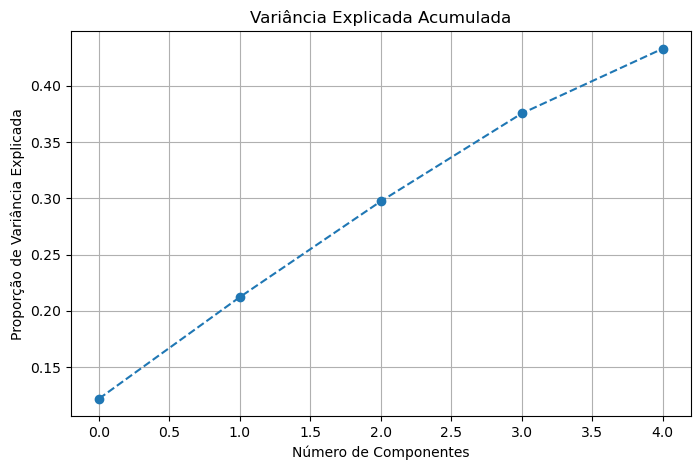

Componentes principais selecionados: 9
Variância explicada acumulada: 0.61

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.32      0.56      0.41      2451
           1       0.75      0.77      0.76     58158
           2       0.19      0.21      0.20     13692
           3       0.44      0.11      0.18     29816
           4       0.36      0.43      0.39      9702
           5       0.04      0.39      0.08       821
           6       0.00      0.57      0.01        23
           7       0.01      0.55      0.02        85

    accuracy                           0.49    114748
   macro avg       0.26      0.45      0.25    114748
weighted avg       0.56      0.49      0.50    114748



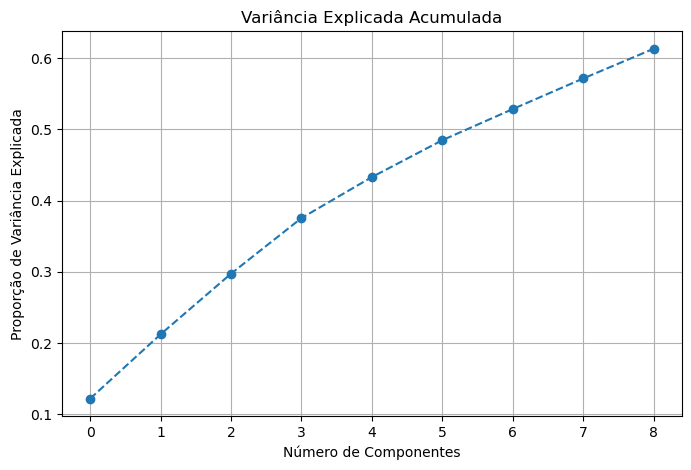

Componentes principais selecionados: 13
Variância explicada acumulada: 0.77

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.22      0.63      0.33      2451
           1       0.87      0.81      0.84     58158
           2       0.20      0.25      0.22     13692
           3       0.67      0.23      0.34     29816
           4       0.48      0.44      0.46      9702
           5       0.05      0.43      0.08       821
           6       0.00      0.65      0.01        23
           7       0.01      0.58      0.02        85

    accuracy                           0.56    114748
   macro avg       0.31      0.50      0.29    114748
weighted avg       0.69      0.56      0.59    114748



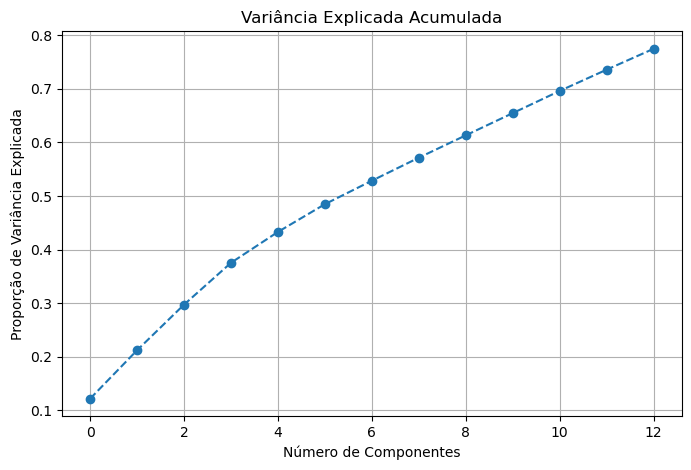

Componentes principais selecionados: 17
Variância explicada acumulada: 0.89

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.20      0.64      0.31      2451
           1       0.88      0.82      0.85     58158
           2       0.19      0.24      0.21     13692
           3       0.69      0.21      0.33     29816
           4       0.47      0.50      0.48      9702
           5       0.05      0.46      0.10       821
           6       0.00      0.61      0.01        23
           7       0.01      0.64      0.02        85

    accuracy                           0.56    114748
   macro avg       0.31      0.52      0.29    114748
weighted avg       0.69      0.56      0.59    114748



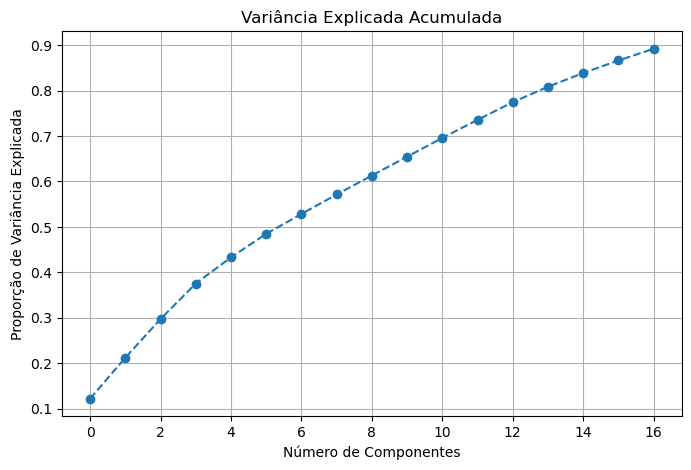

Componentes principais selecionados: 21
Variância explicada acumulada: 0.97

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.25      0.66      0.36      2451
           1       0.88      0.86      0.87     58158
           2       0.20      0.24      0.22     13692
           3       0.74      0.26      0.39     29816
           4       0.48      0.49      0.49      9702
           5       0.05      0.53      0.10       821
           6       0.00      0.61      0.01        23
           7       0.02      0.87      0.04        85

    accuracy                           0.59    114748
   macro avg       0.33      0.56      0.31    114748
weighted avg       0.71      0.59      0.62    114748



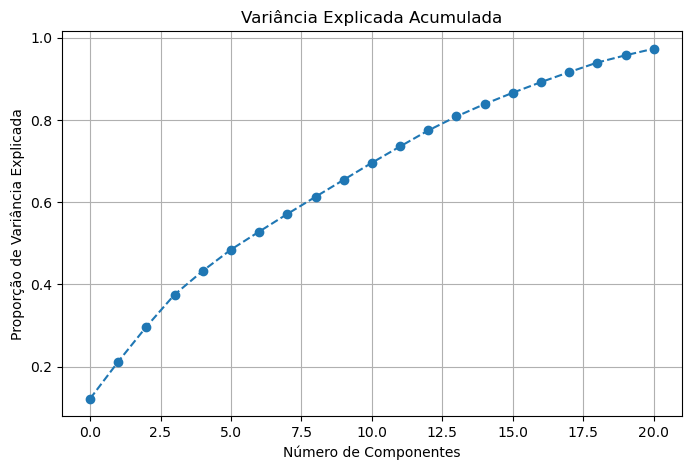

In [73]:
for i in range(5, 25, 4):
    # 2. Aplicar o PCA
    #pca = PCA(n_components=0.95)  #5% da variância
    pca = PCA(n_components=i)  #n components 
    
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    # Número de componentes principais escolhidos
    print(f"Componentes principais selecionados: {pca.n_components_}")
    print(f"Variância explicada acumulada: {np.sum(pca.explained_variance_ratio_):.2f}")
    
    # 3. Treinar um modelo com os componentes principais
    model =LogisticRegression(
        multi_class="multinomial", 
        max_iter=1000,
        verbose=1, 
        random_state=42,
        class_weight="balanced"
    )
    model.fit(X_train_pca, y_train)
    
    # 4. Avaliar o modelo no conjunto de teste
    y_pred = model.predict(X_test_pca)
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))

    explained_variance = pca.explained_variance_ratio_
    
    # Gráfico de variância explicada acumulada
    plt.figure(figsize=(8, 5))
    plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
    plt.title('Variância Explicada Acumulada')
    plt.xlabel('Número de Componentes')
    plt.ylabel('Proporção de Variância Explicada')
    plt.grid()
    plt.show()


In [21]:
fim_total = time.time()

In [22]:
print("Total geral do processamento (segundos): ", fim_total - ini_total)

Total geral do processamento (segundos):  73.11932444572449


In [43]:
winsound.Beep(600, 250)
time.sleep(0.25)

In [21]:
# Avaliar usando F1-score com K-Fold
ini = time.time()
f1_scorer = make_scorer(f1_score, average='weighted')
f1_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring=f1_scorer)

print(f"F1-scores por Fold: {f1_scores}")
print(f"F1-score médio: {np.mean(f1_scores):.2f}")
fim = time.time()
print ("Tempo de execução em segundos:", fim - ini)

F1-scores por Fold: [0.70007462 0.69486375 0.69716943 0.69671992 0.69929677]
F1-score médio: 0.70
Tempo de execução em segundos: 263.92444014549255


In [22]:
# Ajustar modelo no conjunto de treino e avaliar no teste
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42,
                   verbose=1)

In [23]:
y_pred = model.predict(X_test_scaled)

In [24]:
y_pred

array([1, 3, 1, ..., 3, 1, 1], dtype=int64)

In [25]:
ini = time.time()
print(f"F1-score no conjunto de teste: {f1_score(y_test, y_pred, average='weighted'):.2f}")
fim = time.time()
print ("Tempo de execução em segundos:", fim - ini)

F1-score no conjunto de teste: 0.70
Tempo de execução em segundos: 0.06843352317810059


In [26]:
# GridSearchCV para otimização de hiperparâmetros
print("GridSearchCV (LogRegression) --------------")
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parâmetro de regularização
    'penalty': ['l2'],       # Tipo de penalidade (L1: LASSO, L2: Ridge regularization)
    'solver': ['lbfgs']        # Solver compatível com multifuncional
}

GridSearchCV (LogRegression) --------------


In [27]:
ini = time.time()
grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42, solver='lbfgs'),
    param_grid,
    scoring=f1_scorer,
    cv=5
)
fim = time.time()
print ("Tempo de execução em segundos:", fim - ini)

Tempo de execução em segundos: 0.0


In [28]:
ini = time.time()
grid_search.fit(X_train_scaled, y_train)
fim = time.time()
print ("Tempo de execução em segundos:", fim - ini)

Tempo de execução em segundos: 1141.7618961334229


In [29]:
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")
print(f"Melhor F1-score no treino (cross-val): {grid_search.best_score_:.2f}")

Melhores hiperparâmetros: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Melhor F1-score no treino (cross-val): 0.70


In [30]:
print("Escolhendo o melhor modelo -----------")
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
print(f"F1-score do melhor modelo no conjunto de teste: {f1_score(y_test, y_pred_best, average='weighted'):.2f}")
#winsound.Beep(600, 250)
#time.sleep(0.25)

Escolhendo o melhor modelo -----------
F1-score do melhor modelo no conjunto de teste: 0.70


In [31]:
print("Classification Report -------------------")
report = classification_report(y_test, y_pred_best)
print(report)

Classification Report -------------------
              precision    recall  f1-score   support

           0       0.69      0.43      0.53      2451
           1       0.82      0.96      0.89     58158
           2       0.28      0.07      0.11     13692
           3       0.66      0.81      0.73     29816
           4       0.60      0.35      0.44      9702
           5       0.00      0.00      0.00       821
           6       0.00      0.00      0.00        23
           7       0.33      0.14      0.20        85

    accuracy                           0.74    114748
   macro avg       0.42      0.34      0.36    114748
weighted avg       0.69      0.74      0.70    114748



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
fim_total = time.time()

In [33]:
print("Total geral do processamento (segundos): ", fim_total - ini_total)

Total geral do processamento (segundos):  1468.643230676651


In [34]:
winsound.Beep(600, 250)
time.sleep(0.25)